In [2]:
#Getting required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [ ]:
#Getting the datasets for the test purpose
#Note: The datasets are stored in the same directory as the current working directory
#If the datasets are in any other directory, then we need to change the working directory by executing the

In [3]:
insurance = pd.read_csv(r"C:\Users\RAHUL\Desktop\DS_Monali\python\assignments\Final Assignment\insurance_data.csv") #reading
attrition= pd.read_csv(r'C:\Users\RAHUL\Desktop\DS_Monali\python\assignments\Final Assignment\attrition.csv')

In [5]:
insurance.head(2) #target variable is continuous variable

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51


In [6]:
attrition.head(2) #target variable is categorical variable

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8


### Univariate Analysis

In [10]:
#defining a function Univariate 
def Univariate(data,columns=None, directory=os.getcwd()): #Giving function arguments 
    if columns == None: #condition to check argument columns passed by the user
        data= data.iloc[:] #if the argument columns does not hold a value, default selection will be all columns
    else:        #else column passed by user will be assigned
        data= data[columns]#assigning the columns passed by user
    data_obj = data.select_dtypes(include=['object'])#splitting data into categorical variables
    data_num = data.drop(data_obj, axis='columns') #splitting data into numerical variables
    
    for i in data_num: #initiating a loop to plot box plot and histogram for the numericals variables
        plt.figure(figsize=(10,10)) #defining the size of the figure
        plt.subplot(2,1,1) #splitting the figure into two rows, one column and a index one 
        sns.boxplot(x= data_num[i], color='cyan') #plotting boxplot
        plt.xlabel(i, fontsize =14) # label of x axis of the boxplot
        plt.title("Boxplot of " +i, fontsize=16) #title of the boxplot
        plt.subplot(2,1,2) #plot at (row,column) =(2,1) of the figure
        plt.hist(data_num[i], color = 'orange', edgecolor='black') #Plotting the  histogram
        plt.xlabel(i, fontsize= 14) #label on x axis of the histogram
        plt.ylabel('Frequency', fontsize =14) #label on y axis of the histogram
        plt.title("Histogram of " +i , fontsize=16) #title of histogram
        plt.tight_layout(pad=2)    #spacing between 2 plots
        plt.savefig(directory+ "\\" + i + ".png") #saving figure in given directory
        plt.show() #to display the plots
        plt.close("all") #to close the figure window
    for j in data_obj: #intiating a loop to plot bar graphs for the categorical variables
        data_obj[j].value_counts().plot(kind='bar',  #plotting bargraph for each categorical variables
                                       figsize= (8,8),
                                       color= 'coral',
                                       fontsize=13)
        plt.xlabel(j, fontsize= 14) #labeling x axis
        plt.ylabel("Frequency", fontsize=14) #labeling y axis
        plt.title("bar graph of " +j, fontsize =16) #labeling title
        plt.savefig(directory+ "\\" + j + ".png") #saving figure in given directory
        plt.show() #to display the plots
        plt.close("all") #to close the figure window
    

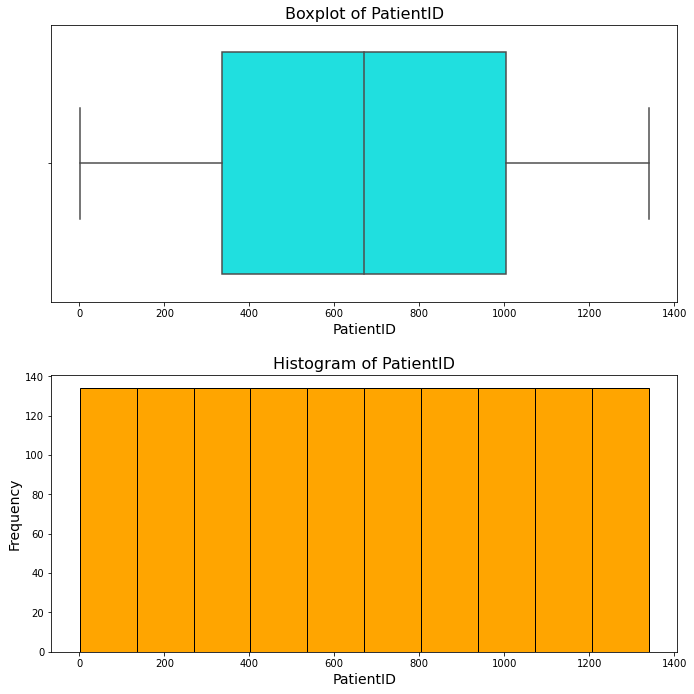

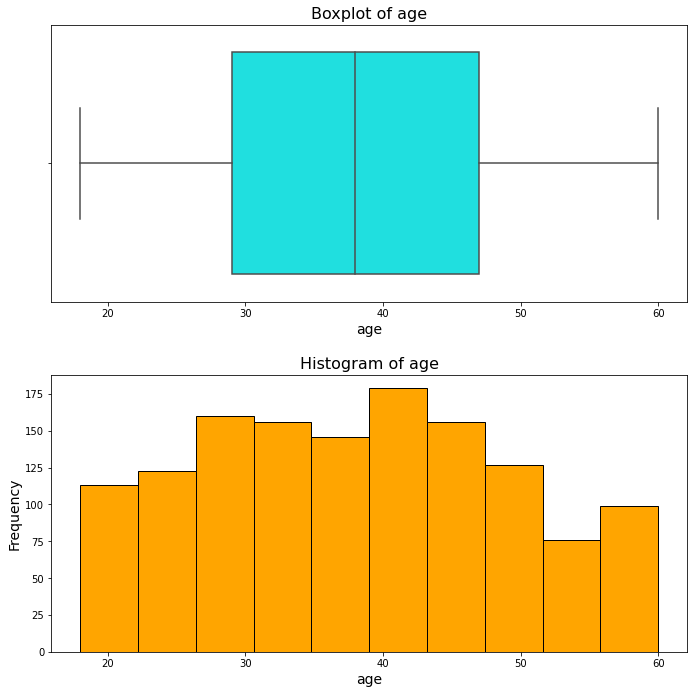

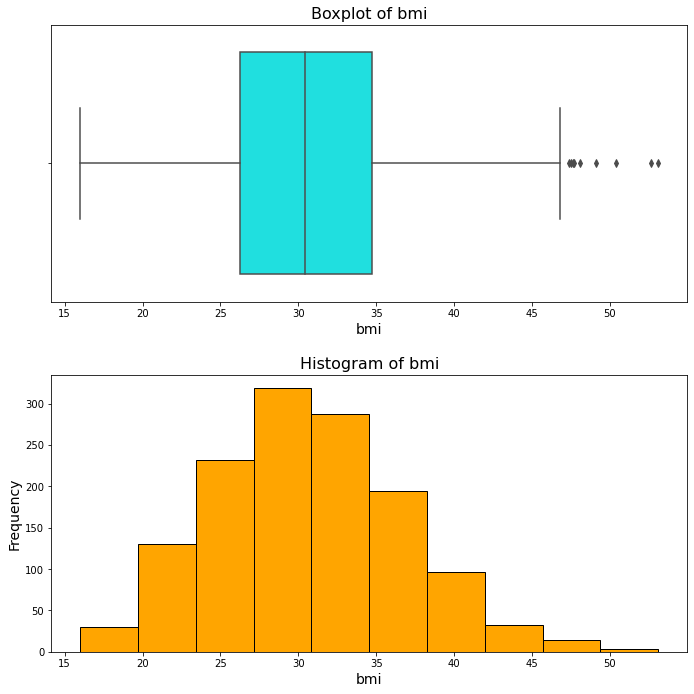

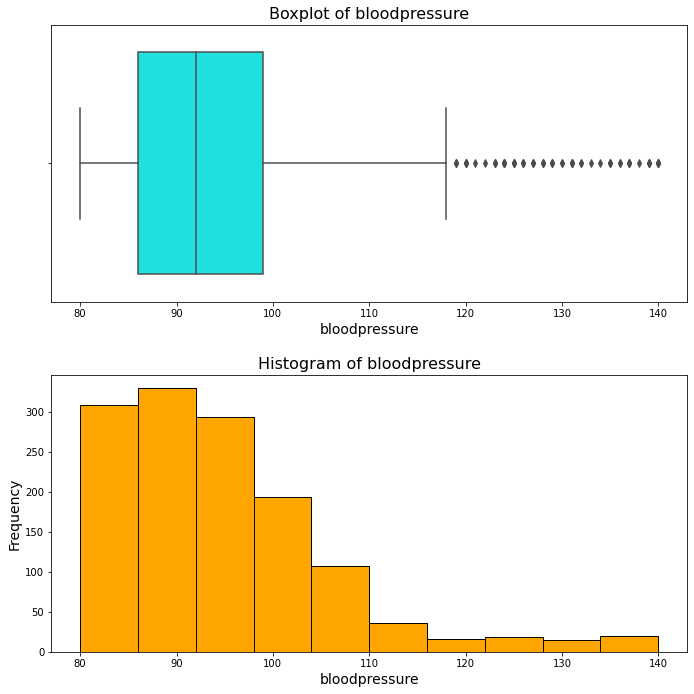

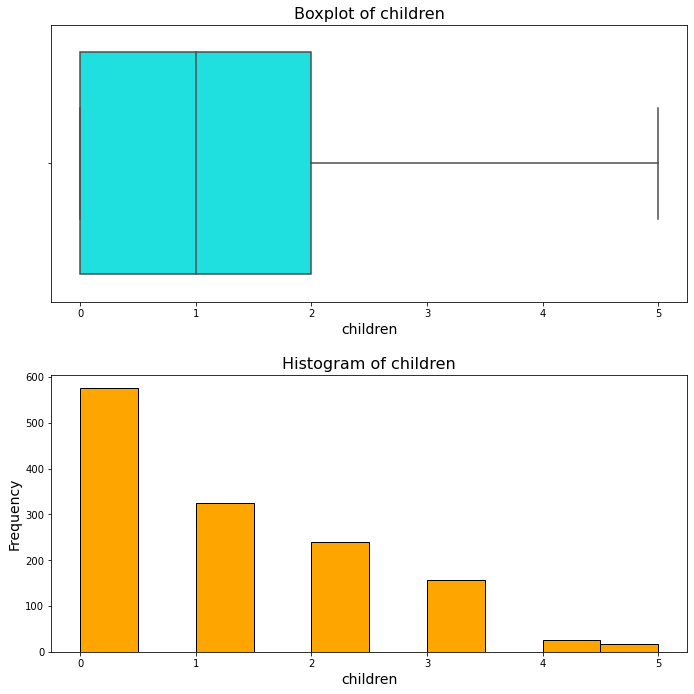

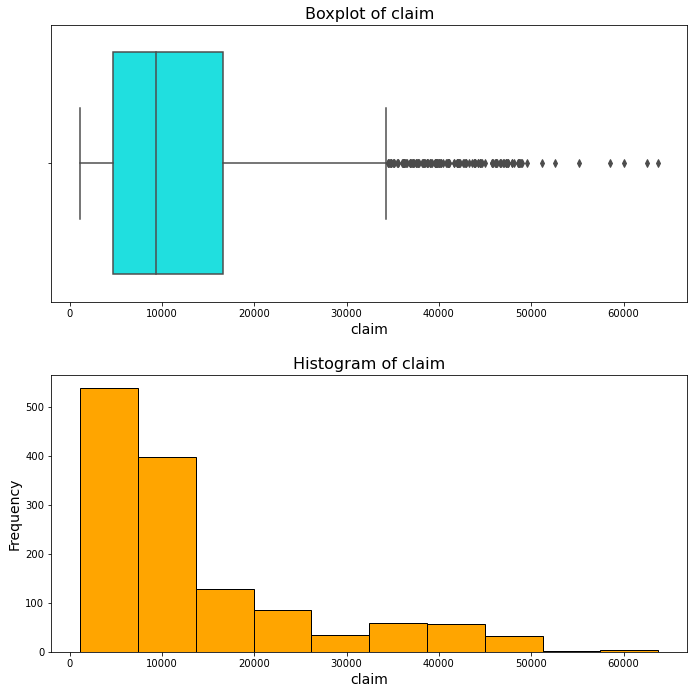

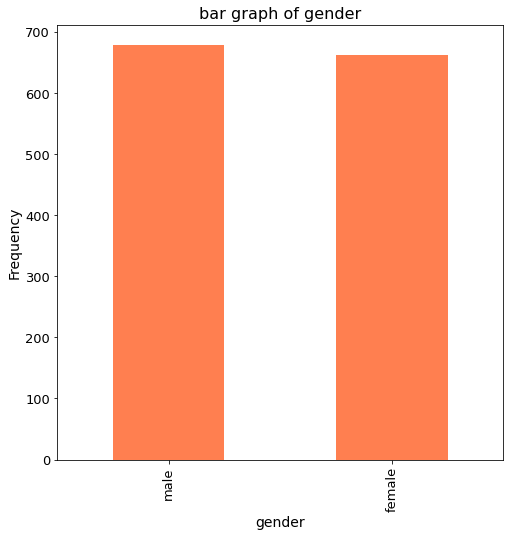

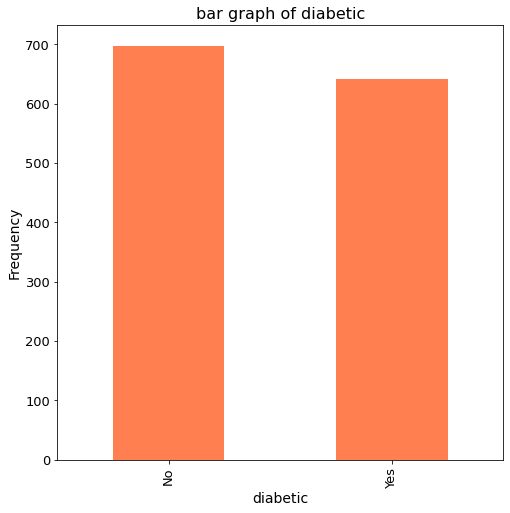

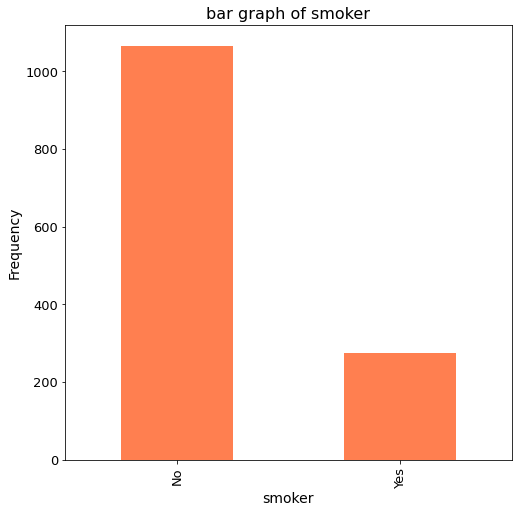

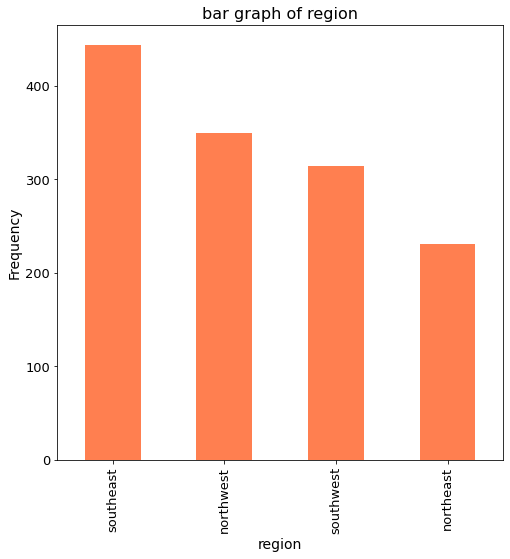

In [12]:
Univariate(insurance)

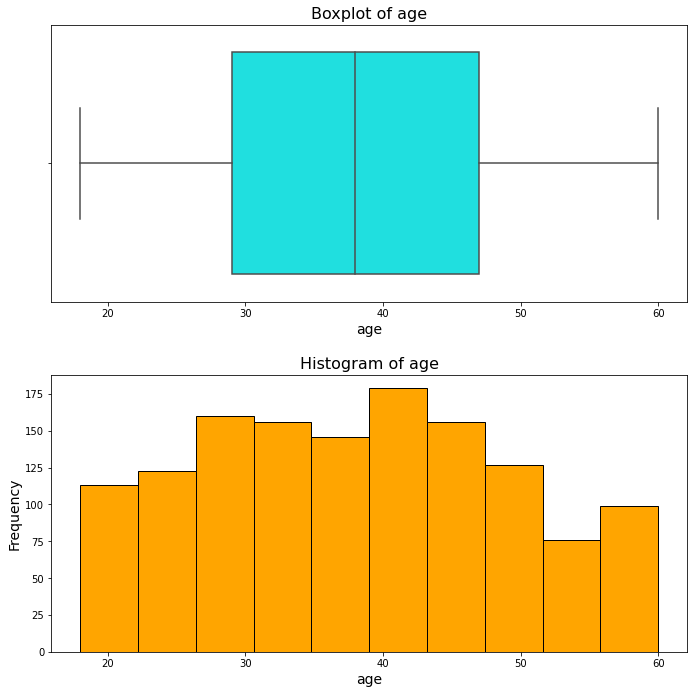

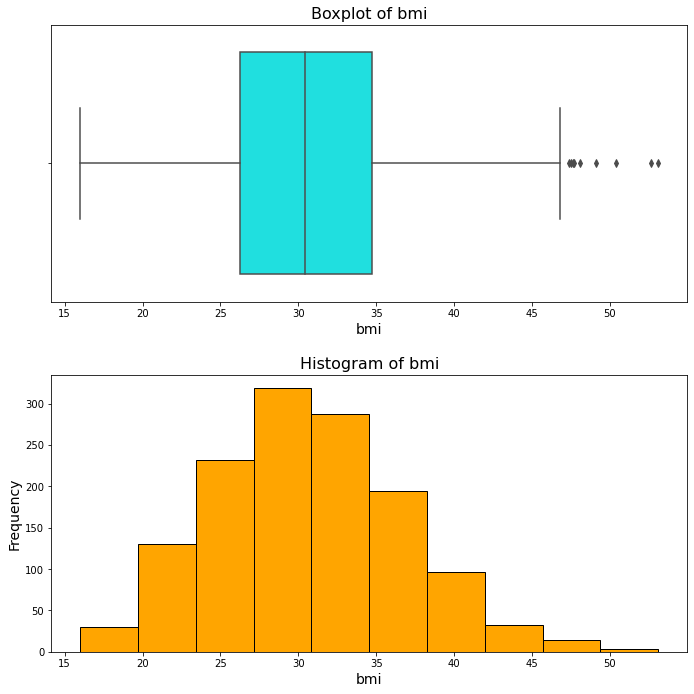

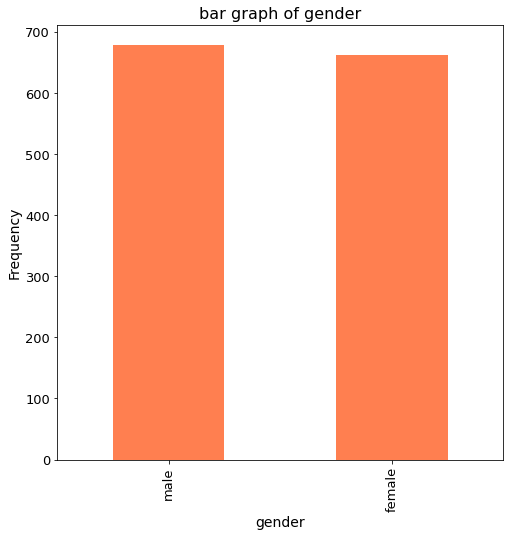

In [13]:
Univariate(insurance, columns =["age", "bmi", "gender"])

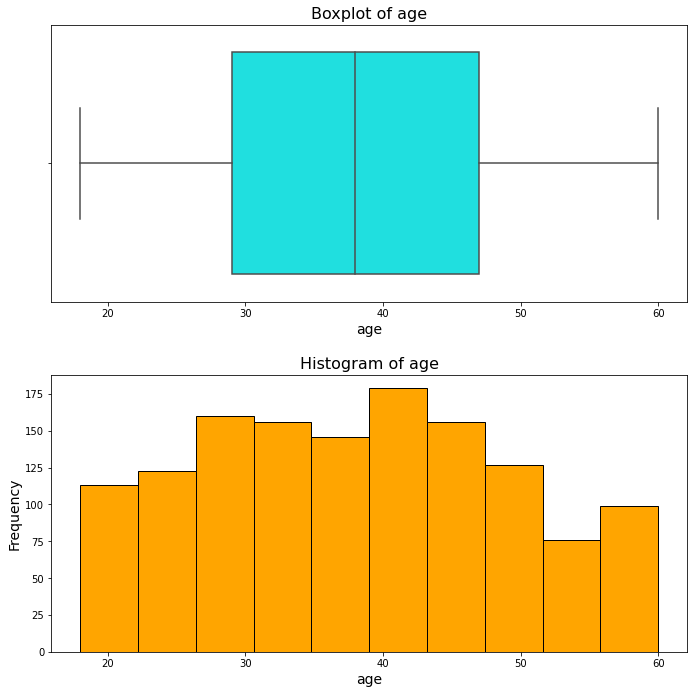

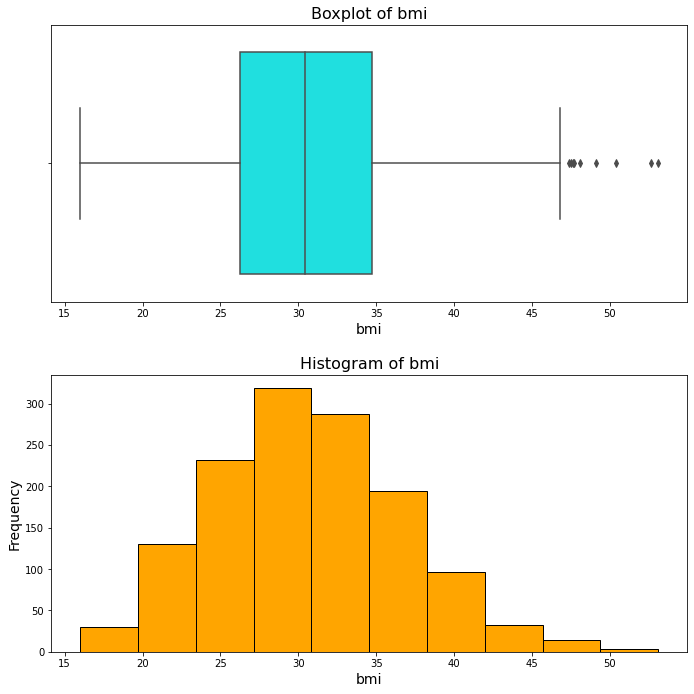

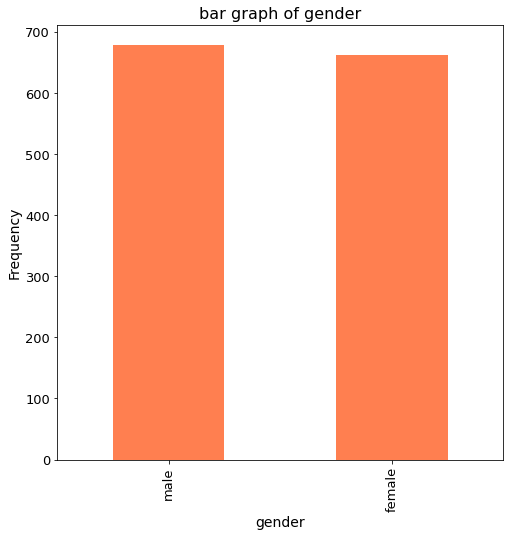

In [15]:
Univariate(insurance, columns =["age", "bmi", "gender"], directory = r"C:\Users\RAHUL\Desktop\DS_Monali\python\assignments\Final Assignment\graph_export")

In [24]:
#defining a function Univariate 
def Univariate(data,columns=None, directory=os.getcwd(), unique_discrete=None): #Giving function arguments 
    if columns == None: #condition to check argument columns passed by the user
        data= data.iloc[:] #if the argument columns does not hold a value, default selection will be all columns
    else:        #else column passed by user will be assigned
        data= data[columns]#assigning the columns passed by user
    data_obj = [variable for variable in data.columns if data[variable].dtypes == 'O'] #splitting data into categorical variables
    data_num = [variable for variable in data.columns if data[variable].dtypes != 'O'] #splitting data into numerical variables
    data_discrete = [variable for variable in data_num if len(data[variable].unique())<unique_discrete +1] #splitting in discrete variables
    data_continuous=[variable for variable in data_num if variable not in data_discrete + ["date"]]#splitting in continuous variables

    
    for variable in data_continuous: #initiating a loop to plot box plot and histogram for the numericals variables
        
        plt.figure(figsize=(10,10)) #defining the size of the figure
        plt.subplot(2,1,1) #splitting the figure into two rows, one column and a index one 
        sns.boxplot(x= data[variable], color='cyan') #plotting boxplot
        plt.xlabel(variable, fontsize =14) # label of x axis of the boxplot
        plt.title("Boxplot of " +variable, fontsize=16) #title of the boxplot
        plt.subplot(2,1,2) #plot at (row,column) =(2,1) of the figure
        plt.hist(data[variable], color = 'orange', edgecolor='black') #Plotting the  histogram
        plt.xlabel(variable, fontsize= 14) #label on x axis of the histogram
        plt.ylabel('Frequency', fontsize =14) #label on y axis of the histogram
        plt.title("Histogram of " +variable , fontsize=16) #title of histogram
        plt.tight_layout(pad=2)    #spacing between 2 plots
        plt.savefig(directory+ "\\" + variable + ".png") #saving figure in given directory
        plt.show() #to display the plots
        plt.close("all") #to close the figure window
        
        
        
    for variable in data_obj: #intiating a loop to plot bar graphs for the categorical variables
        data[variable].value_counts().plot(kind='bar',  #plotting bargraph for each categorical variables
                                       figsize= (8,8),
                                       color= 'coral',
                                       fontsize=13)
        plt.xlabel(variable, fontsize= 14) #labeling x axis
        plt.ylabel("Frequency", fontsize=14) #labeling y axis
        plt.title("bar graph of " +variable, fontsize =16) #labeling title
        plt.savefig(directory+ "\\" + variable + ".png") #saving figure in given directory
        plt.show() #to display the plots
        plt.close("all") #to close the figure window
        
        
    for variable in data_discrete: #intiating a loop to plot bar graphs for the discrete variables
        data[variable].value_counts().plot(kind='bar',  #plotting bargraph for each discrete variables
                                       figsize= (8,8),
                                       color= 'coral',
                                       fontsize=13)
        plt.xlabel(variable, fontsize= 14) #labeling x axis
        plt.ylabel("Frequency", fontsize=14) #labeling y axis
        plt.title("bar graph of " +variable, fontsize =16) #labeling title
        plt.savefig(directory+ "\\" + variable + ".png") #saving figure in given directory
        plt.show() #to display the plots
        plt.close("all") #to close the figure window
    
    

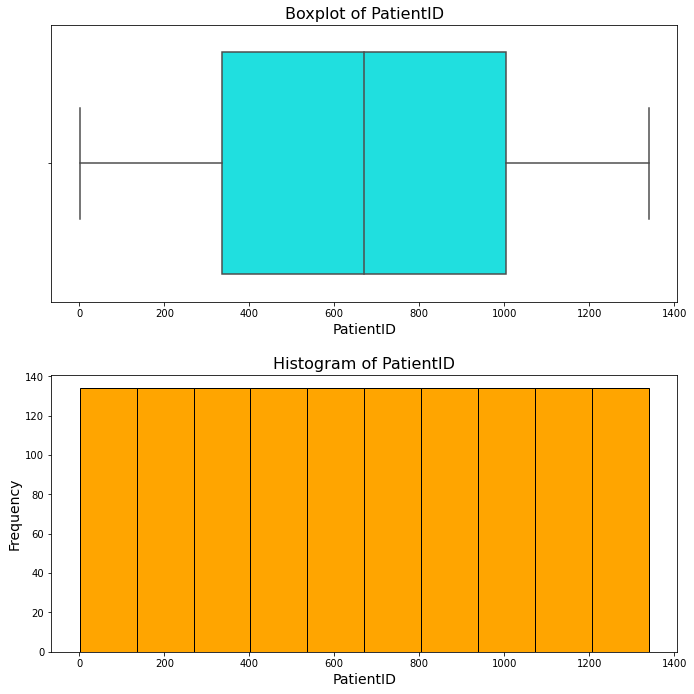

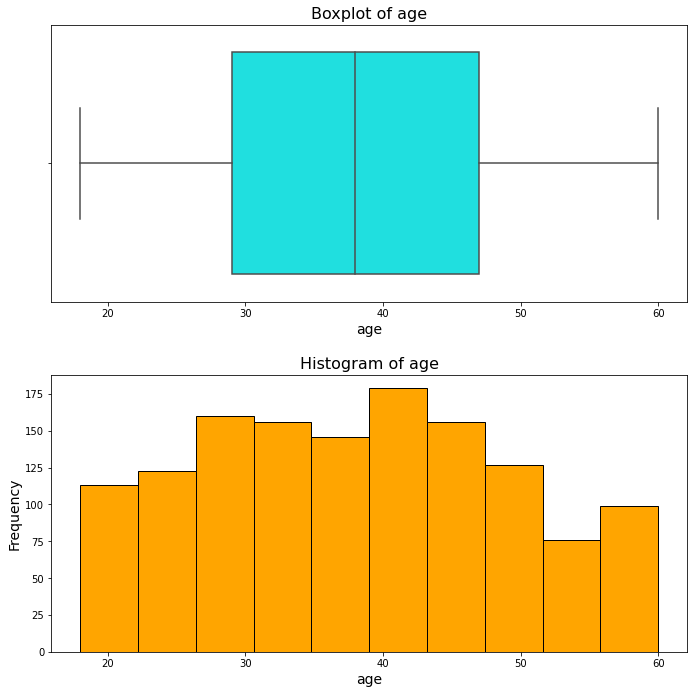

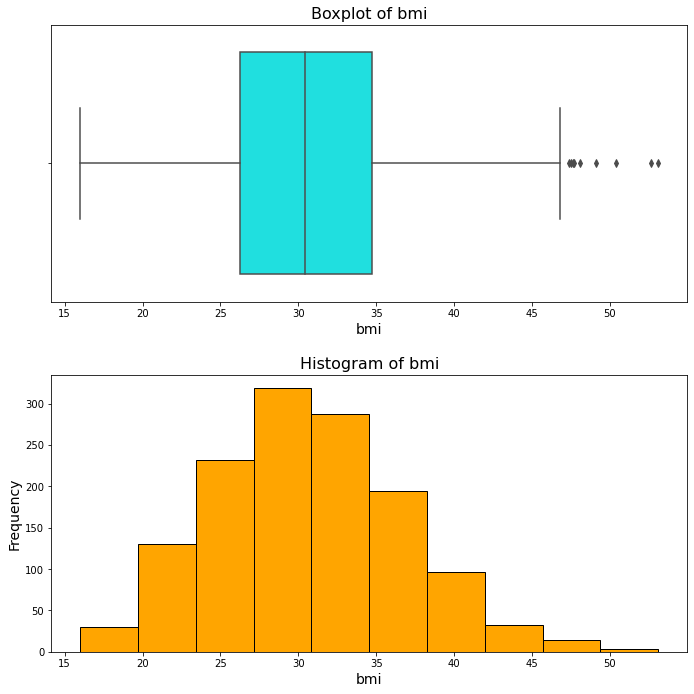

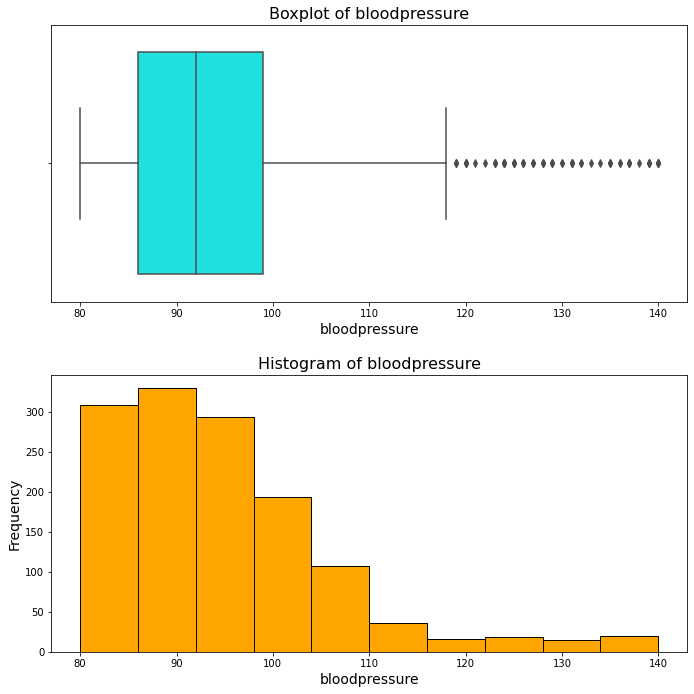

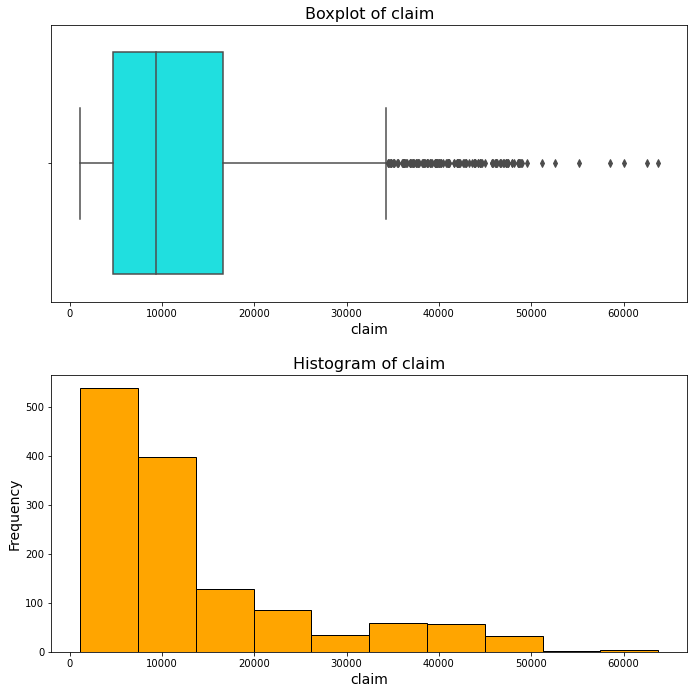

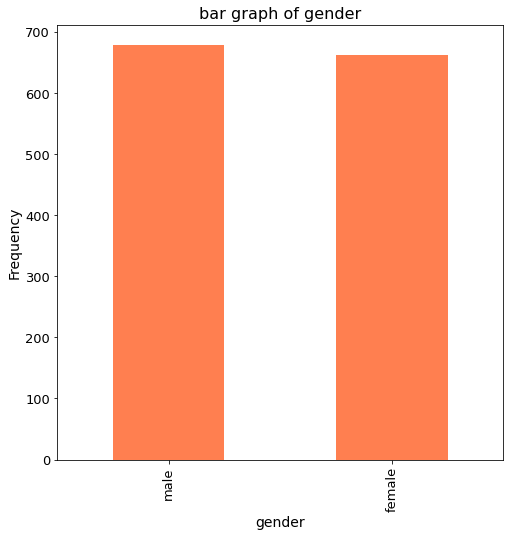

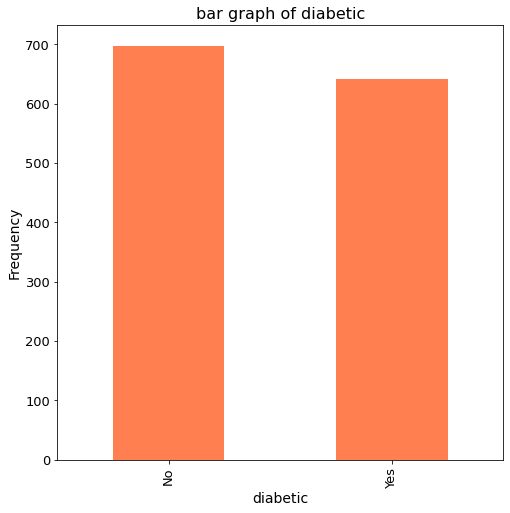

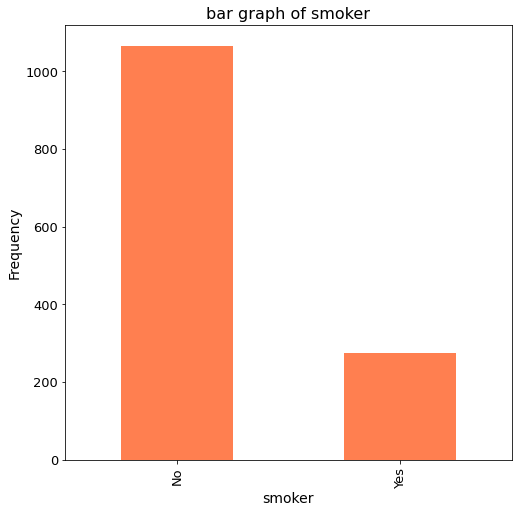

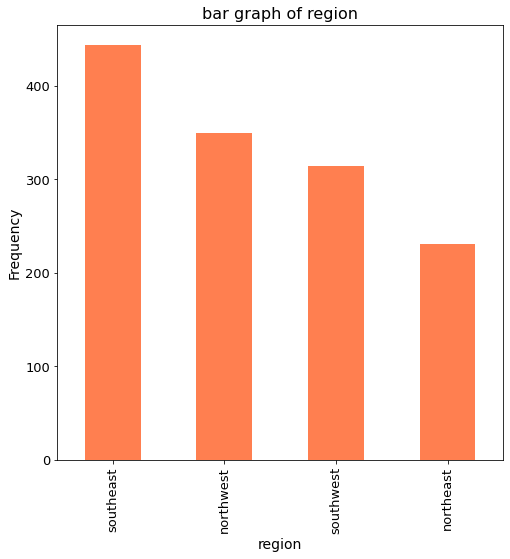

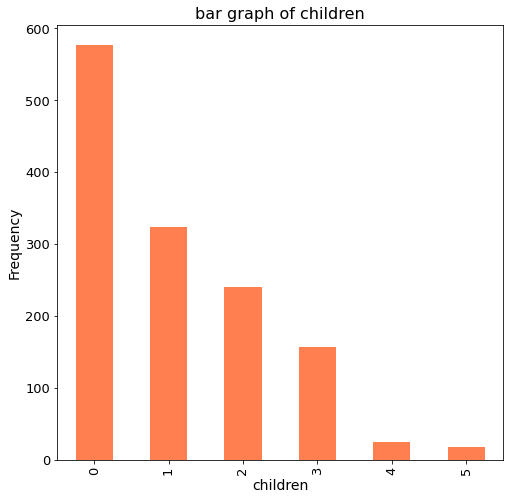

In [25]:
Univariate(insurance, directory = r"C:\Users\RAHUL\Desktop\DS_Monali\python\assignments\Final Assignment\graph_export",unique_discrete=6 )

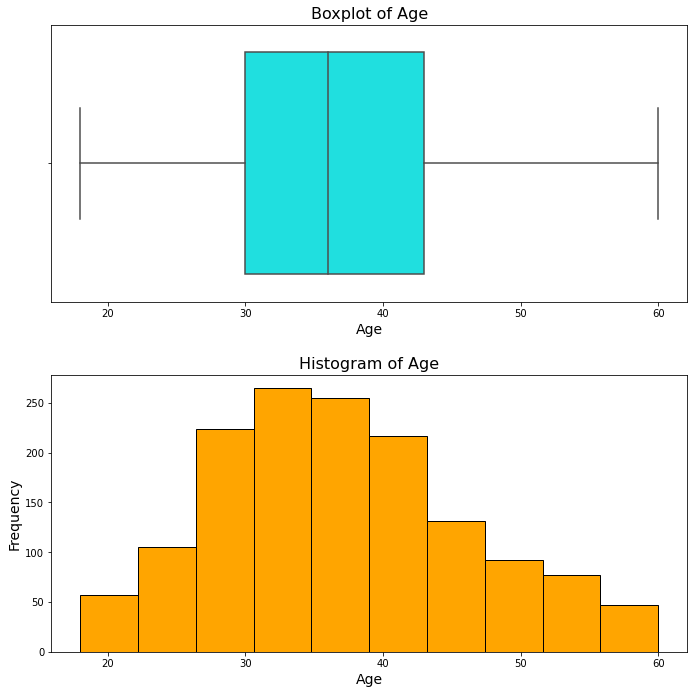

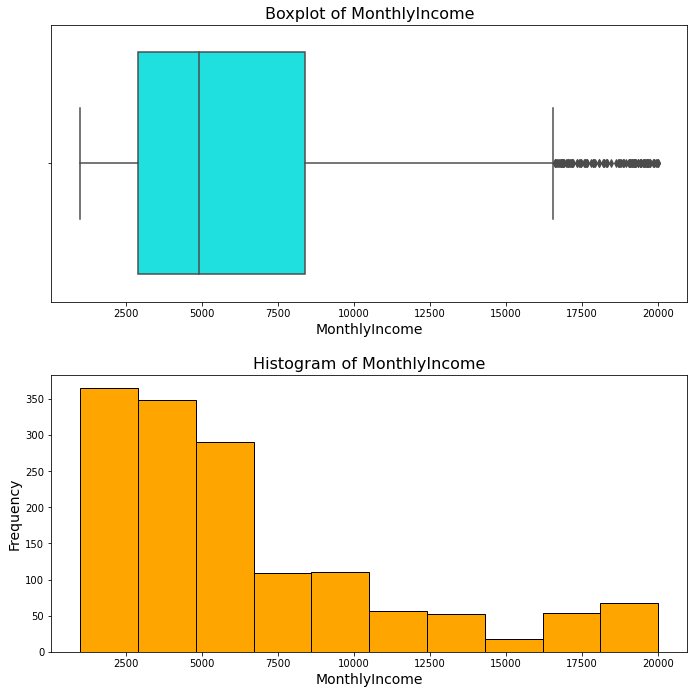

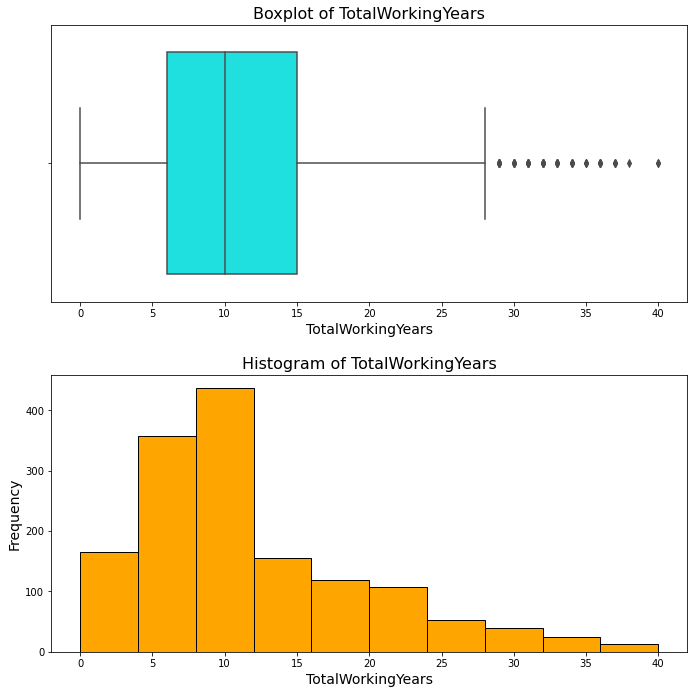

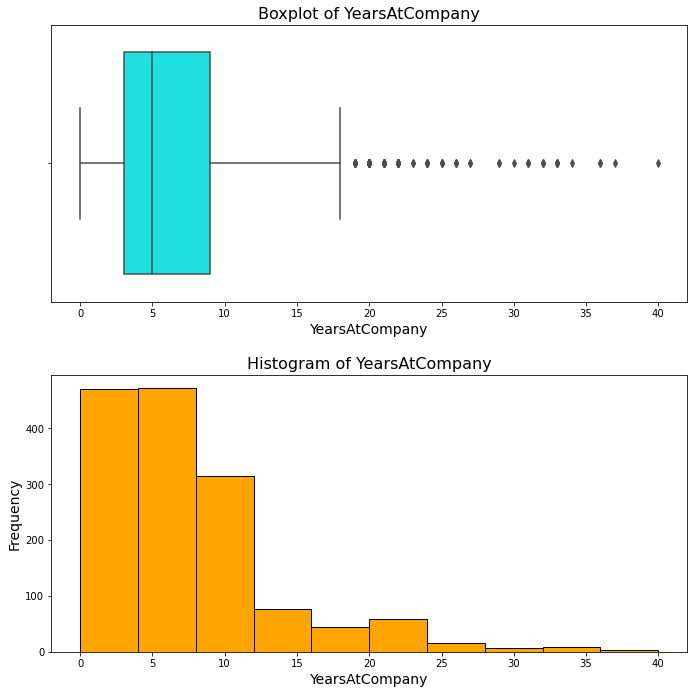

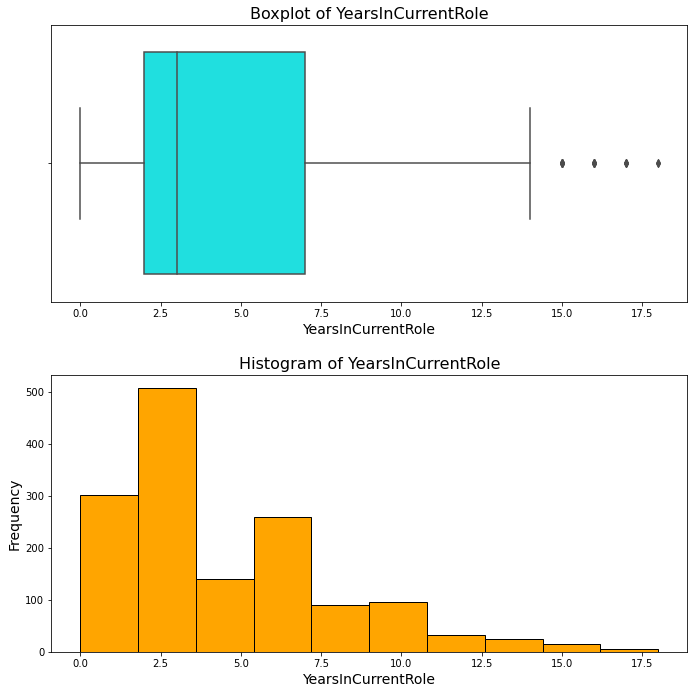

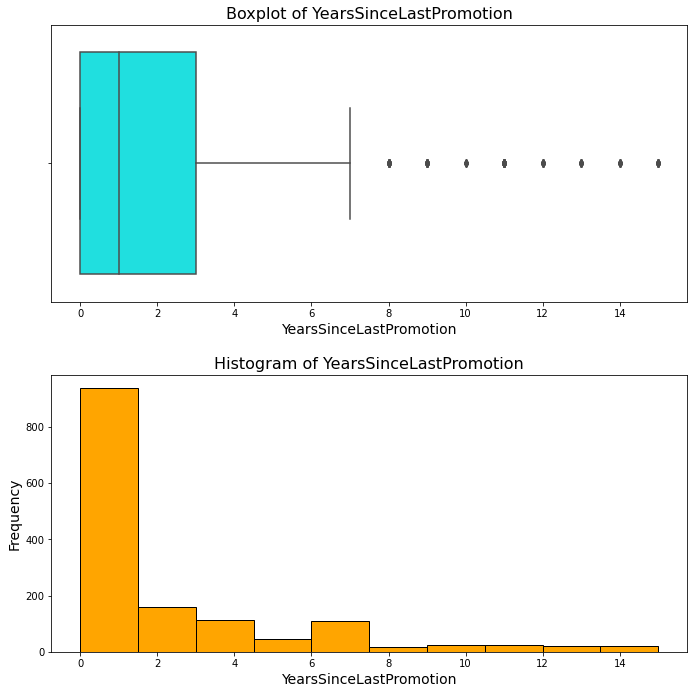

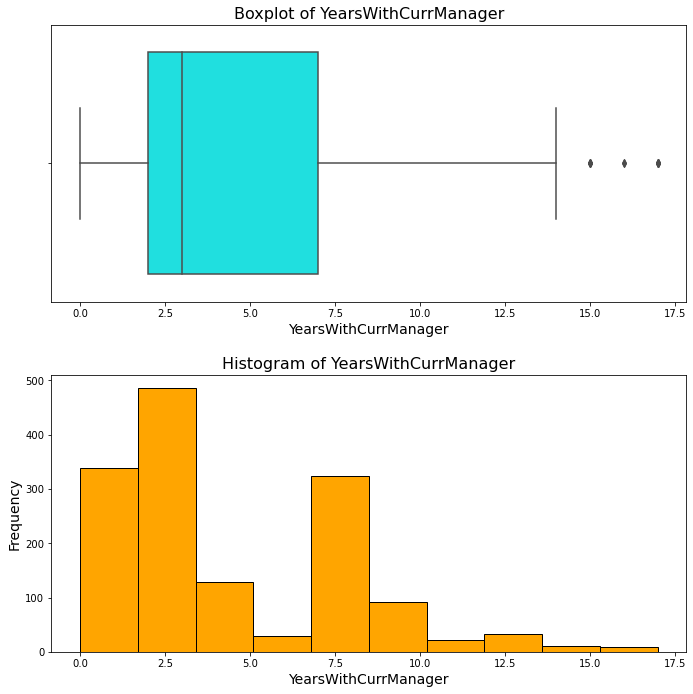

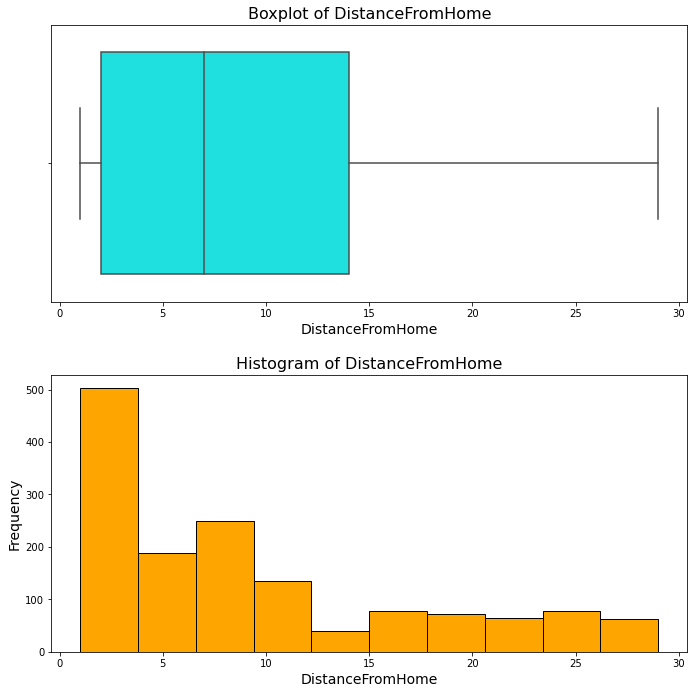

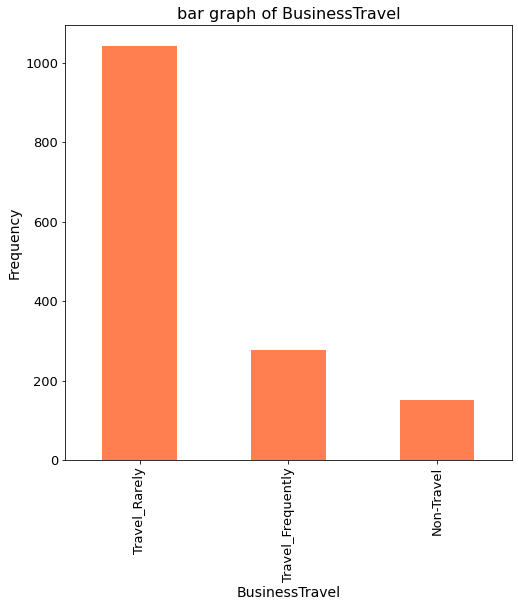

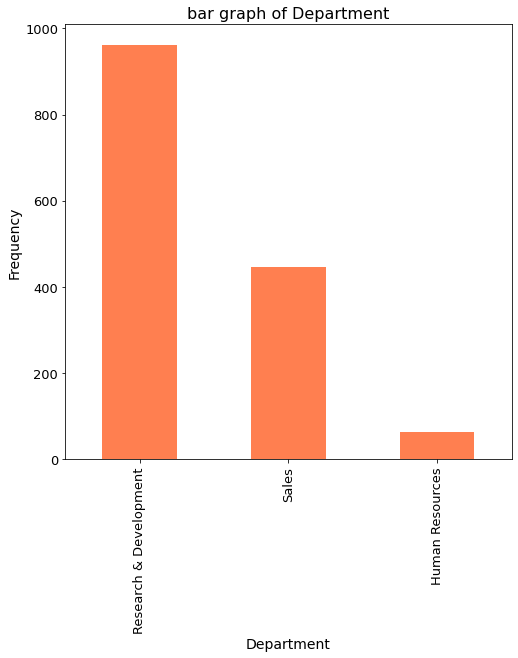

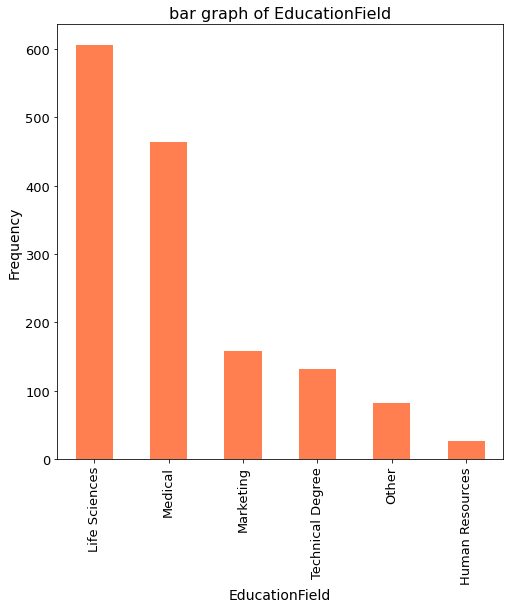

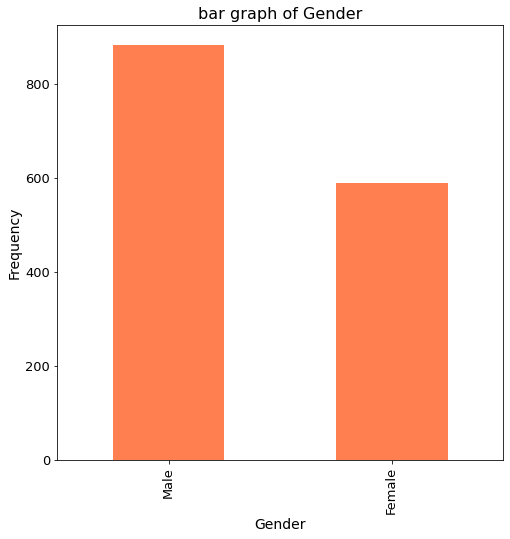

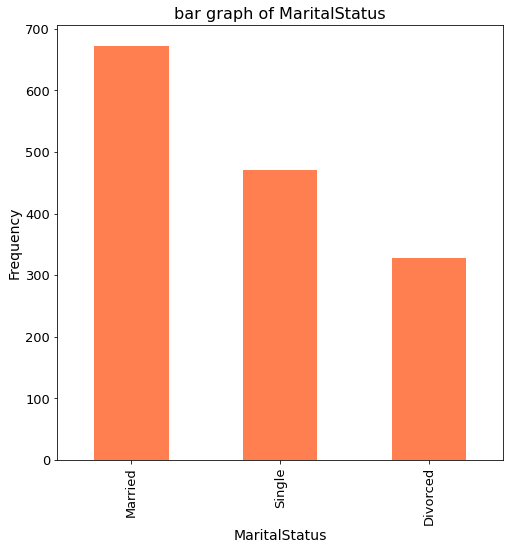

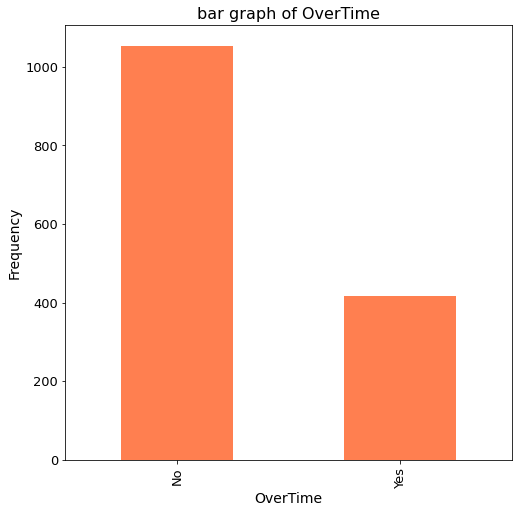

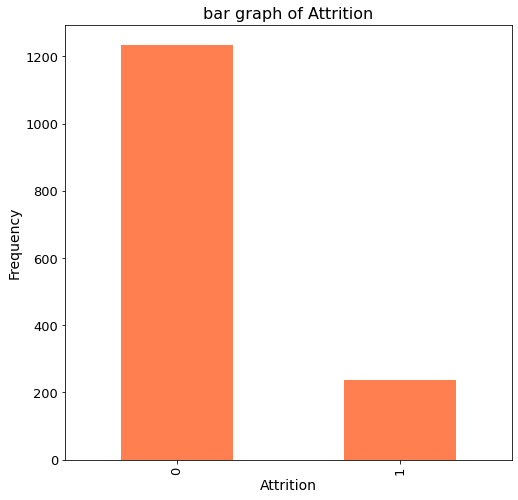

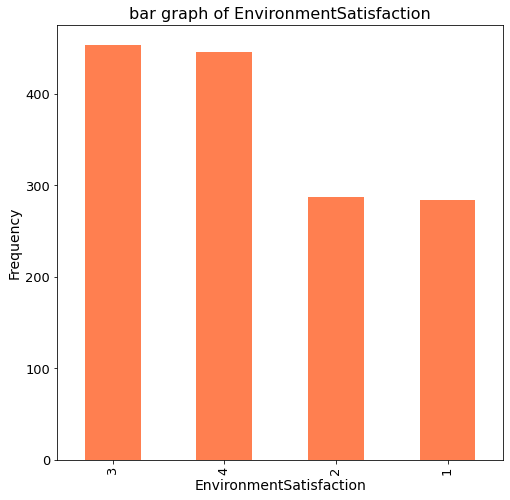

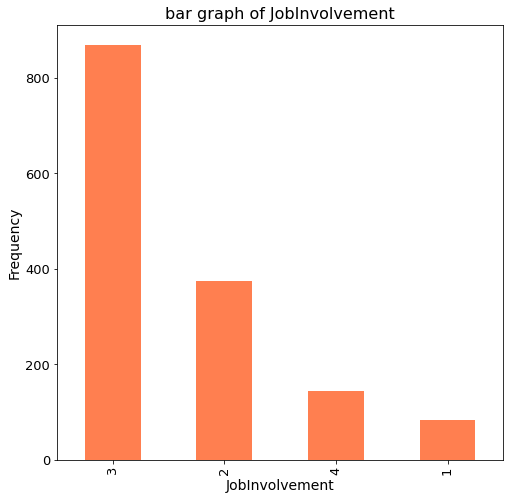

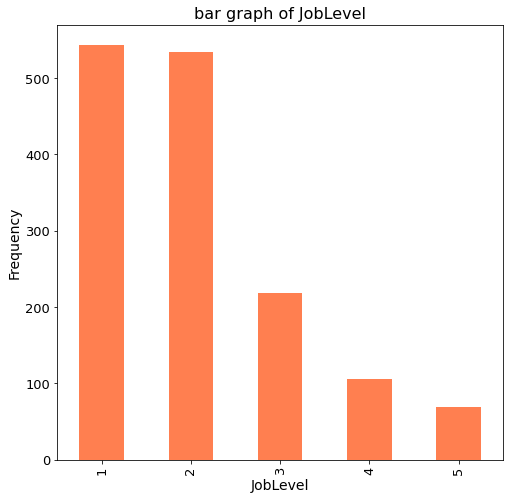

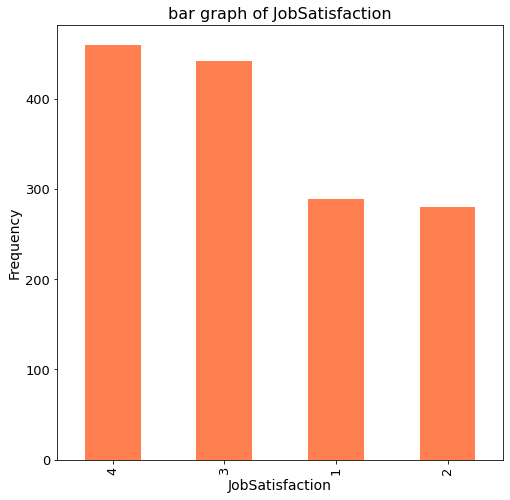

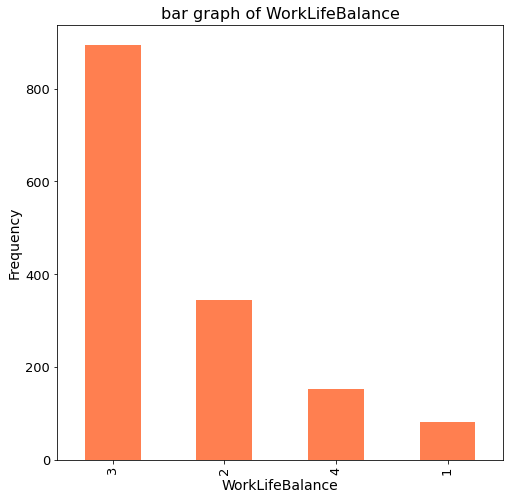

In [26]:
Univariate(attrition, directory = r"C:\Users\RAHUL\Desktop\DS_Monali\python\assignments\Final Assignment\graph_export",unique_discrete=6 )

### Bivariate Analysis

In [76]:
def Bivariate(data, target, columns=None, directory=os.getcwd(), unique_discrete=None):
    
    if columns == None: #condition to check argument columns passed by the user
        data= data.iloc[:] #if the argument columns does not hold a value, default selection will be all columns
    else:        #else column passed by user will be assigned
        data= data[columns]#assigning the columns passed by user
        
    data_obj = [variable for variable in data.columns if data[variable].dtypes == 'O'] #splitting data into categorical variables
    data_num = [variable for variable in data.columns if data[variable].dtypes != 'O'] #splitting data into numerical variables
    data_discrete = [variable for variable in data_num if len(data[variable].unique())<unique_discrete +1] #splitting in discrete variables
    data_continuous=[variable for variable in data_num if variable not in data_discrete + ["date"]]#splitting in continuous variables
    
    if target in data_continuous: # if target variable in continuous varaibles
        for variable in data_obj or variable in data_discrete : #for every variable in categorical or discrete variables list
            fig_dims = (10, 5)
            fig, axs = plt.subplots(nrows=1, figsize=fig_dims)
            sns.boxplot(x= data[variable], y = data[target], color='cyan') #plotting boxplot
            plt.xlabel(variable, fontsize =14) # label of x axis of the boxplot
            plt.ylabel(target, fontsize =14) # label of x axis of the boxplot
            plt.title("Boxplot of " +variable + "vs "+ target , fontsize=16) #title of the boxplot
            plt.savefig(directory+ "\\" + variable +"-"+target + ".png") #saving figure in given directory
        for variable in data_continuous:
            sns.regplot(x= variable, y=target, data=data)
            plt.legend(loc=(0))
            plt.figure(figsize=(8, 4))
            plt.savefig(directory+ "\\" + variable +"-"+target+ ".png") #saving figure in given directory
    elif target in data_obj or target in data_discrete :
        for variable in data_obj or variable in data_discrete:
            plt.figure(figsize=(10,10)) #defining the size of the figure
            sns.catplot(x= variable, y= target, kind= 'bar', data= data)
            plt.xlabel(variable, fontsize =14) # label of x axis of the catplot
            plt.ylabel(target, fontsize =14) # label of x axis of the catplot
            plt.title("Catplot of " +variable + " vs "+ target , fontsize=16) #title of the catplot
            plt.savefig(directory+ "\\" + variable +"-"+target + ".png") #saving figure in given directory
          
        for variable in data_continuous:
            fig_dims = (20, 5)
            fig, axs = plt.subplots(nrows=1, figsize=fig_dims)
            sns.boxplot(x= data[target], y = data[variable], color='cyan') #plotting boxplot
            plt.xlabel(variable, fontsize =14) # label of x axis of the boxplot
            plt.ylabel(target, fontsize =14) # label of x axis of the boxplot
            plt.title("Boxplot of " +variable + " vs "+ target , fontsize=16) #title of the boxplot
            plt.savefig(directory+ "\\" + variable +"-"+target + ".png") #saving figure in given directory
          

<Figure size 720x720 with 0 Axes>

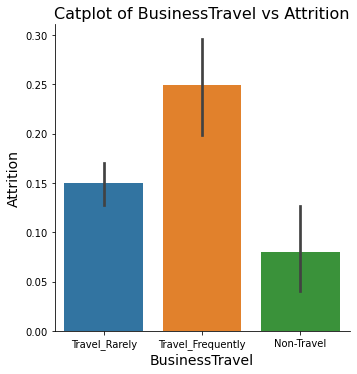

<Figure size 720x720 with 0 Axes>

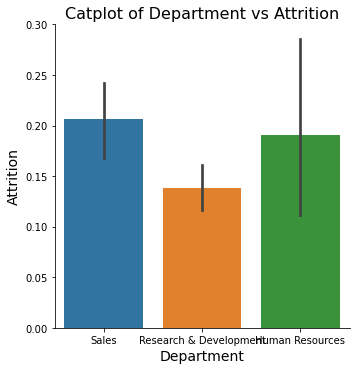

<Figure size 720x720 with 0 Axes>

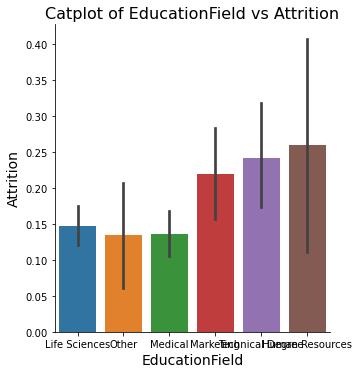

<Figure size 720x720 with 0 Axes>

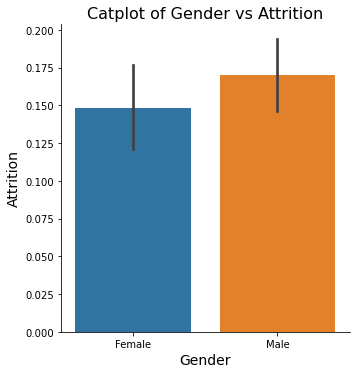

<Figure size 720x720 with 0 Axes>

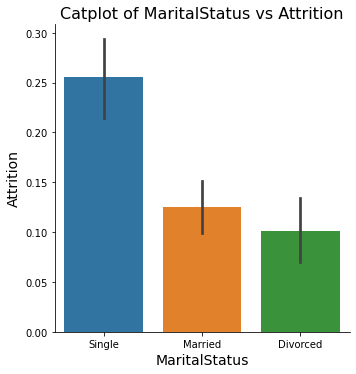

<Figure size 720x720 with 0 Axes>

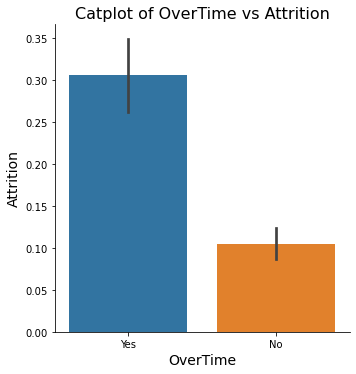

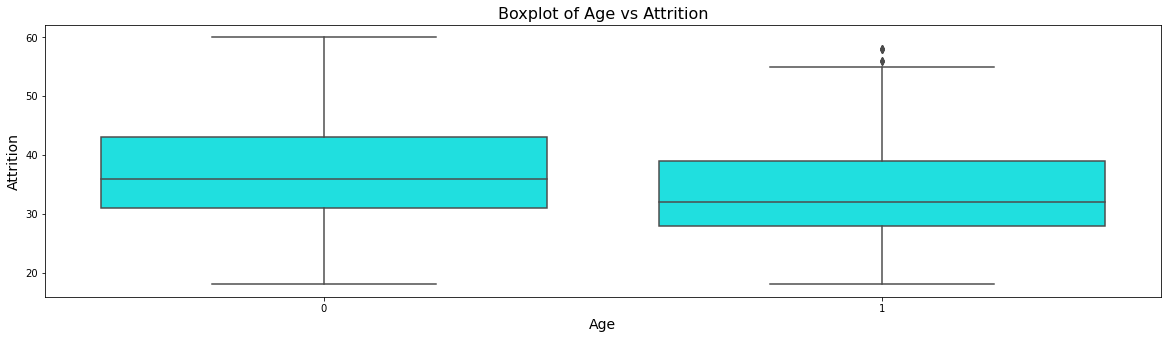

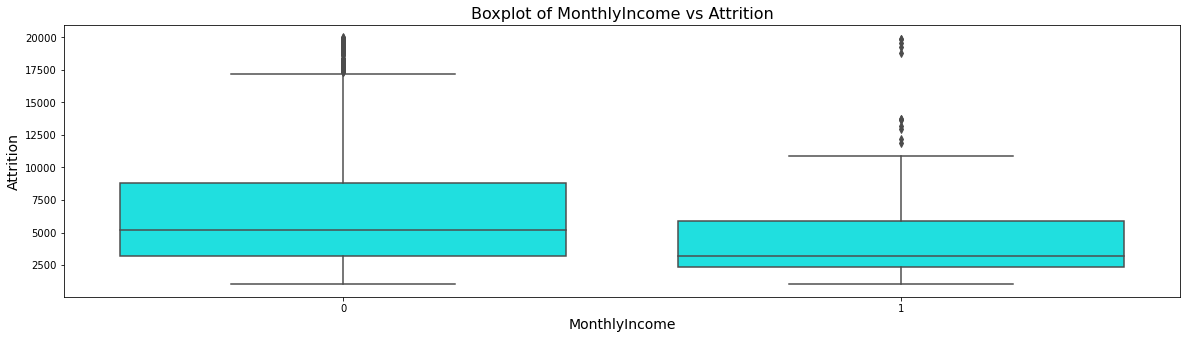

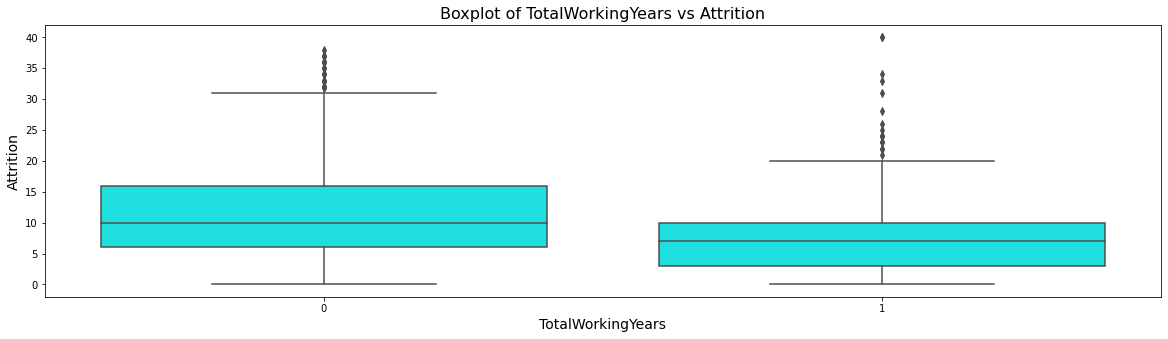

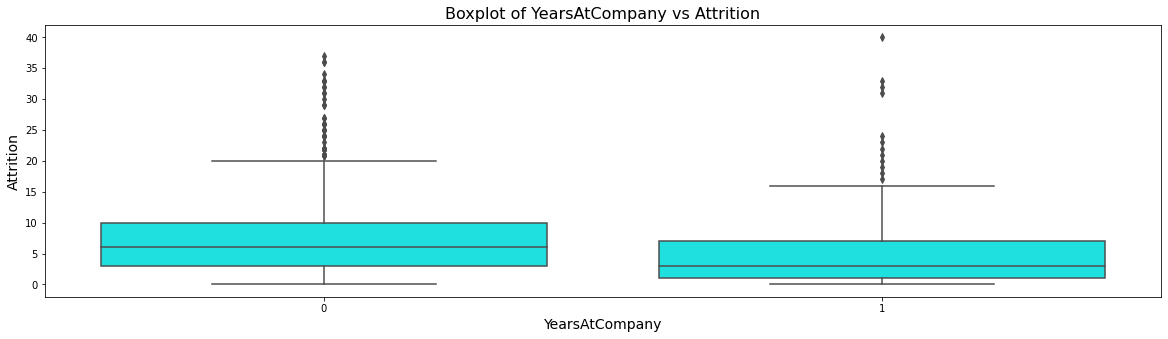

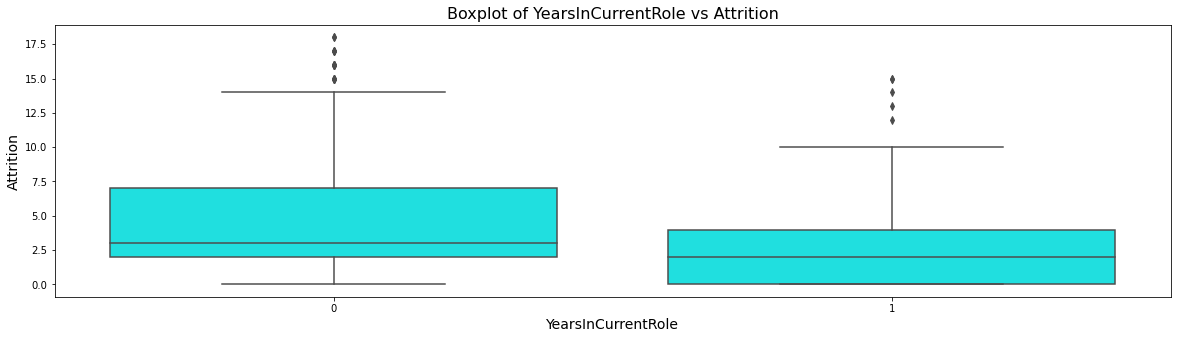

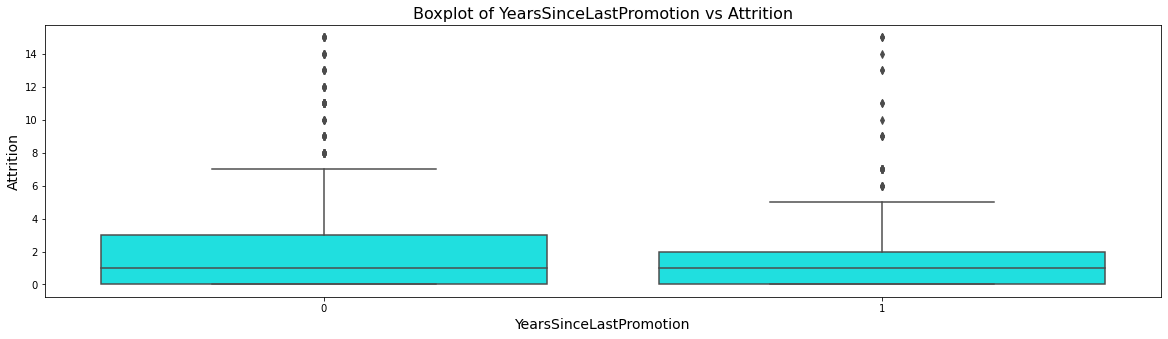

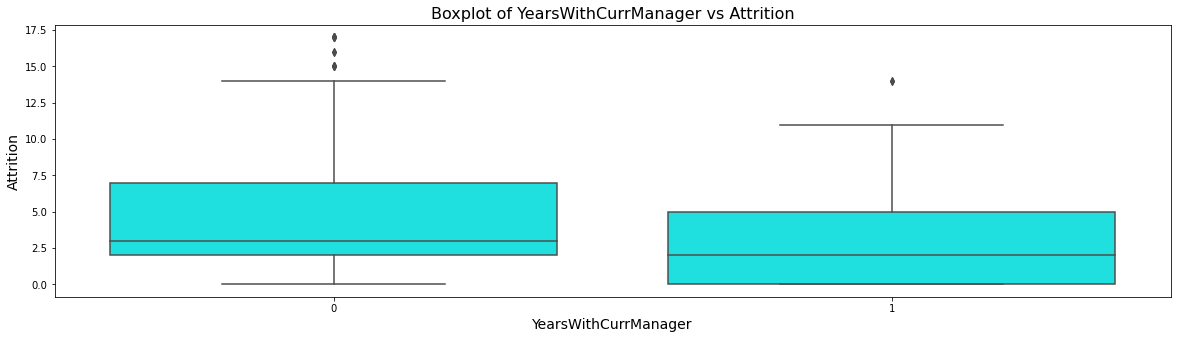

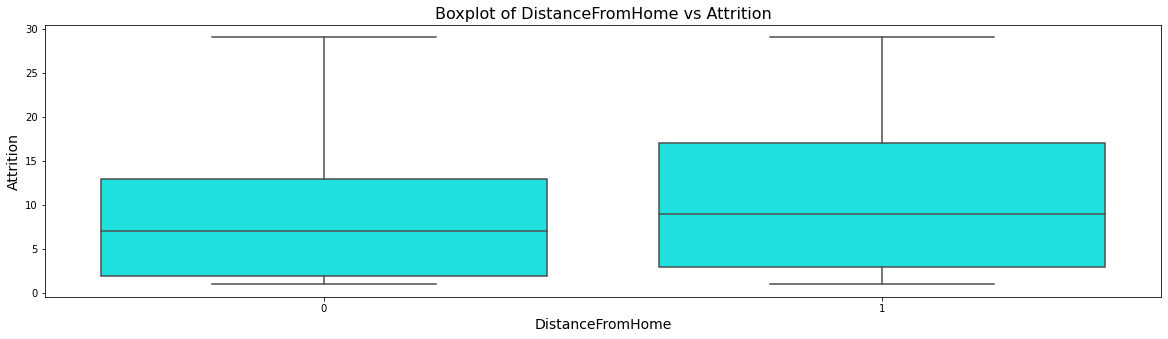

In [77]:
Bivariate(attrition, "Attrition", columns=None, directory=os.getcwd(), unique_discrete=6)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


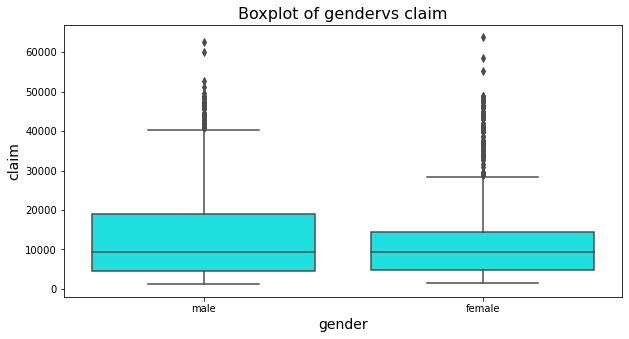

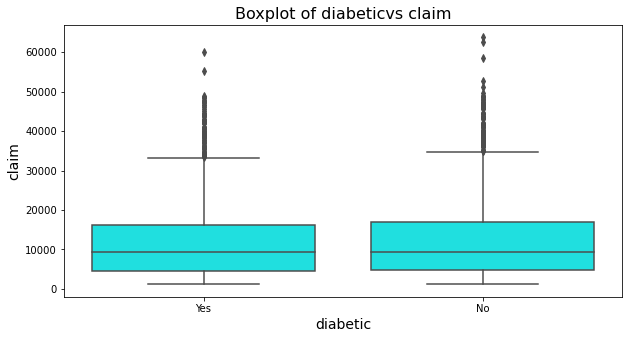

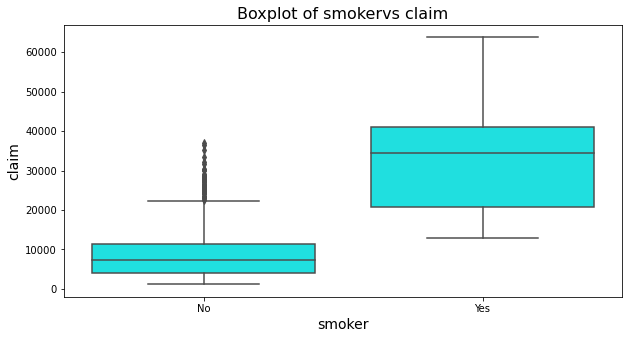

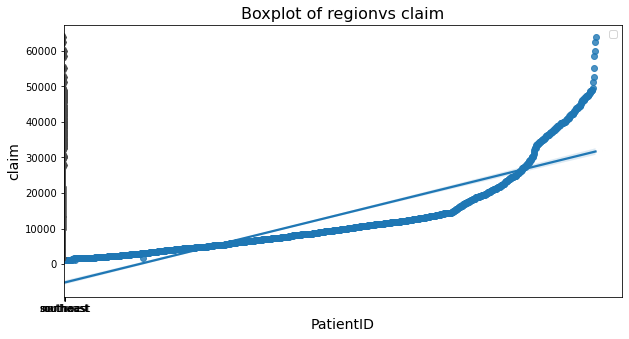

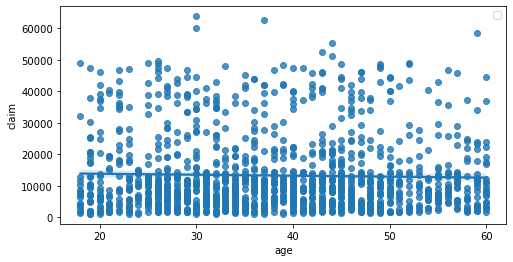

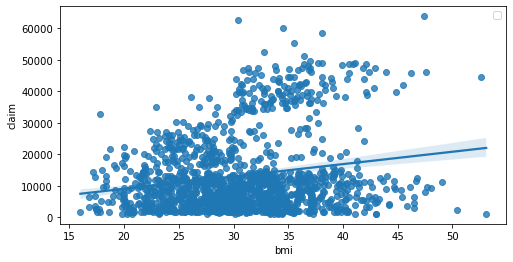

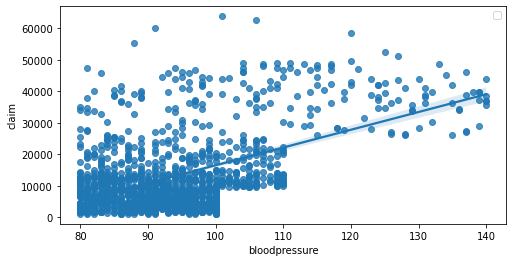

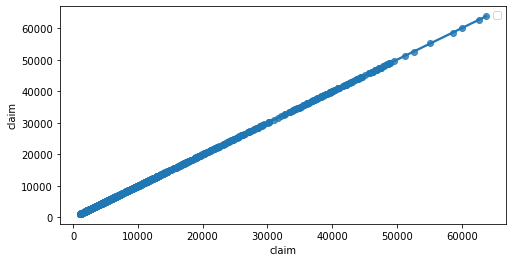

<Figure size 576x288 with 0 Axes>

In [74]:
Bivariate(insurance, "claim", columns=None, directory=os.getcwd(), unique_discrete=6)

### Multivariate Analysis

In [ ]:
def Multivariate(data, variable1, variable2, variable3, columns=None, directory=os.getcwd(), unique_discrete=None):
    
    if columns == None: #condition to check argument columns passed by the user
        data= data.iloc[:] #if the argument columns does not hold a value, default selection will be all columns
    else:        #else column passed by user will be assigned
        data= data[columns]#assigning the columns passed by user
        
    data_obj = [variable for variable in data.columns if data[variable].dtypes == 'O'] #splitting data into categorical variables
    data_num = [variable for variable in data.columns if data[variable].dtypes != 'O'] #splitting data into numerical variables
    data_discrete = [variable for variable in data_num if len(data[variable].unique())<unique_discrete +1] #splitting in discrete variables
    data_continuous=[variable for variable in data_num if variable not in data_discrete + ["date"]]#splitting in continuous variables
    
    if variable1